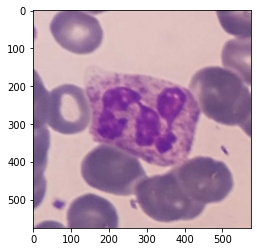

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Train/Neutrophil/95-5-4-1_73_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [7]:
def rgb_to_ggb(img, contrast = 1.7):
    g_contast = np.minimum(255, img.copy()[:,:,1]*contrast)
    img[:,:,1] = g_contast
    img[:,:,0] = g_contast
    return img

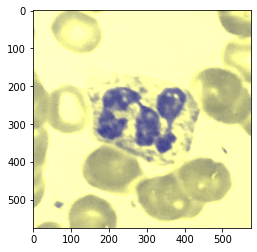

In [70]:
img_ggb = rgb_to_ggb(img, 2.1)
plt.imshow(img_ggb)

In [75]:
vectorized = img.reshape((-1,3))
vectorized

array([[224, 198, 199],
       [224, 198, 199],
       [224, 198, 199],
       ...,
       [222, 189, 184],
       [222, 189, 184],
       [222, 189, 184]], dtype=uint8)

In [76]:
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

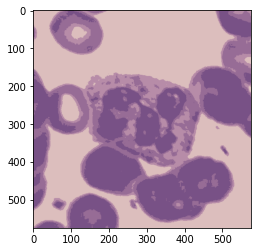

In [77]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
plt.imshow(result_image)

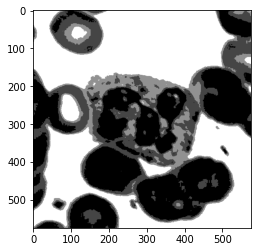

In [78]:
img_gray = cv2.cvtColor(result_image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

In [28]:
import pickle
model = pickle.load(open('kmeans_model.pk','rb'))
model_5 = pickle.load(open('kmeans_model.pk','rb'))
model_7 = pickle.load(open('kmeans_model.pk','rb'))

In [29]:
def preprocess(image, contrast = 2.1, k=3, preprocess_list = ['kmeans','gray']):
    image = rgb_to_ggb(image, contrast)
    if 'kmeans' in preprocess_list:
        vectorized = image.reshape((-1,3))
        if k == 5:
            label = model_5.predict(vectorized)
            center = np.uint8(model_5.cluster_centers_)
        elif k == 7:
            label = model_7.predict(vectorized)
            center = np.uint8(model_7.cluster_centers_)
        else:
            label = model.predict(vectorized)
            center = np.uint8(model.cluster_centers_)
        
        res = center[label]
        image = res.reshape((img.shape))

    if 'gray' in preprocess_list:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    return image
    
    

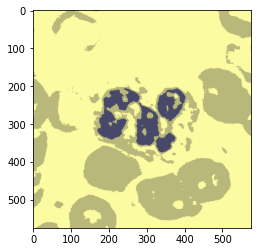

In [21]:
plt.imshow(preprocess(img, preprocess_list=['kmeans']))

In [85]:
import os 

folders = os.listdir('Train')
for folder in folders:
    files = os.listdir(f'Train/{folder}')
    for file in files:
        img = cv2.imread(f"Train/{folder}/{file}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = preprocess(img, preprocess_list=[])
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'./train_ggb/{folder}/{file}', img)

In [22]:
folders = os.listdir('Train')
for folder in folders:
    files = os.listdir(f'Train/{folder}')
    for file in files:
        img = cv2.imread(f"Train/{folder}/{file}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = preprocess(img, preprocess_list=['kmeans'])
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'./train_ggb_k_means_sklearn/{folder}/{file}', img)

In [26]:
folders = os.listdir('Train')
for folder in folders:
    print(f"{folder}....")
    files = os.listdir(f'Train/{folder}')
    for file in files:
        img = cv2.imread(f"Train/{folder}/{file}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = preprocess(img, preprocess_list=['kmeans'], k=5)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'./train_ggb_k_means_k5/{folder}/{file}', img)

Basophil....
Eosinophil....
Lymphocyte....
Monocyte....
Neutrophil....


In [30]:
folders = os.listdir('Train')
for folder in folders:
    print(f"{folder}....")
    files = os.listdir(f'Train/{folder}')
    for file in files:
        img = cv2.imread(f"Train/{folder}/{file}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = preprocess(img, preprocess_list=['kmeans'], k=7)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'./train_ggb_k_means_k7/{folder}/{file}', img)

Basophil....
Eosinophil....
Lymphocyte....


KeyboardInterrupt: 

In [88]:
folders = os.listdir('train_ggb_k_means')
for folder in folders:
    print(f"{folder}....")
    files = os.listdir(f'train_ggb_k_means/{folder}')
    for file in files:
        img = cv2.imread(f"train_ggb_k_means/{folder}/{file}",0)
        cv2.imwrite(f'./train_ggb_k_means_gray/{folder}/{file}', img)